In [1]:
import pandas as pd
#tablas a importar
tablas = ['winequality-red.csv',
          'winequality-white.csv']

archivos = []

ruta_data = 'data'  # Ruta relativa a la carpeta "data"

#Importar los archivos CSV y guardarlos en una lista
for t in tablas:
    ruta_archivo = f'{ruta_data}/{t}'
    datos = pd.read_csv(ruta_archivo,
                        sep = ';',
                        encoding='latin-1',
                        low_memory=False)
    archivos.append(datos)

#Desempaquetado de archivos importados
vino_tinto,vino_blanco = archivos[:2]
df_vinos= pd.concat([vino_blanco, vino_tinto], axis=0, ignore_index=True)  # Concatenación por filas


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
cauchy,84.852766,536.210910,549.769102,inf,0.255057,0.000000e+00
norm,85.787887,558.418463,571.976655,inf,0.221063,2.473179e-279
beta,85.788060,559.376656,586.493039,inf,0.225175,6.274395e-290
gamma,85.788060,557.376668,577.713956,inf,0.225175,6.268976e-290
chi2,85.789582,558.478750,578.816037,inf,0.227028,9.053203e-295
logistic,85.838897,525.646785,539.204977,inf,0.232758,5.290087e-310
exponpow,86.083784,606.443900,626.781187,inf,0.256873,0.000000e+00
powerlaw,88.408647,368.121132,388.458420,inf,0.371090,0.000000e+00
expon,89.605619,424.120716,437.678907,inf,0.470309,0.000000e+00


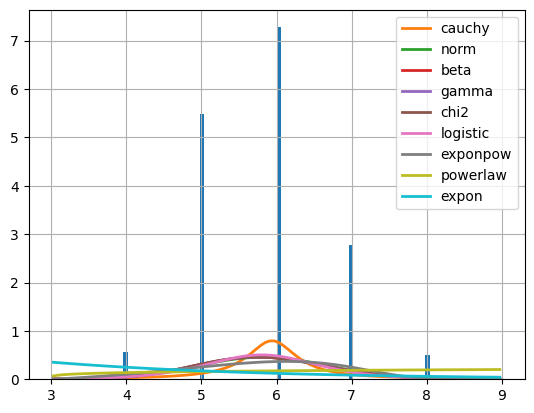

In [2]:
# Identificacion de la distribucion que mejor se ajusta al set de datos
from fitter import Fitter, get_common_distributions


distribuciones = ['cauchy', 'chi2', 'expon',  'exponpow', 'gamma',
                  'norm', 'powerlaw', 'beta', 'logistic']

fitter = Fitter(df_vinos.quality, distributions=distribuciones)
fitter.fit()
fitter.summary(Nbest=10)